<a href="https://colab.research.google.com/github/vvviet2908/DA-ML/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Understanding the data - EDA:

Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

**Feature 'Time'** contains the seconds elapsed between each transaction and the first transaction in the dataset. 

The **Feature 'Amount'** is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 

**Feature 'Class'** is the response variable and it takes value 1 in case of fraud and 0 otherwise.

**Source:** https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#Load the data
data = pd.read_csv("https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#finding the shape of dataframe (finding no.of observations and features in the given dataframe)
data.shape

(284807, 31)

=> There are 284,807 observation in the data

In [4]:
#Checking the null value
data.isnull().sum().max()

0

In [5]:
#finding whether it is balanced data or imbalanced data
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

=> From the above info it is clear that it is an imbalanced dataset

In [6]:
print('No Frauds:', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds:', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds: 99.83 % of the dataset
Frauds: 0.17 % of the dataset


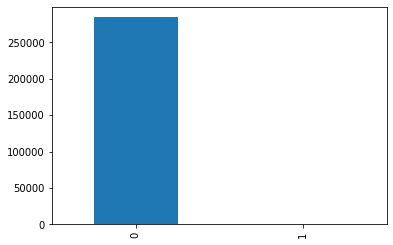

In [7]:
data['Class'].value_counts().plot(kind='bar')

=> Only 492 (or 0.172%) of transaction are fraud. If we use this dataframe as the base for our predictive models we may get a lot of misclassified errors.

**So the aim of this Fraud Detection is maximize the detection of fraudulent transactions, and also minimize the number of false positives**

About the 'Time' and 'Amount' features

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


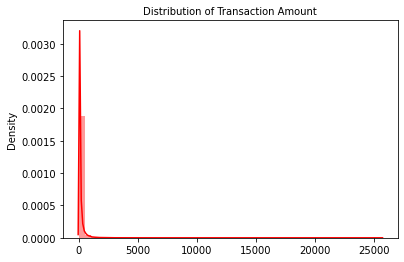

In [8]:
amount_val = data['Amount'].values
sns.distplot(amount_val, color='r').set_title('Distribution of Transaction Amount', fontsize=10)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


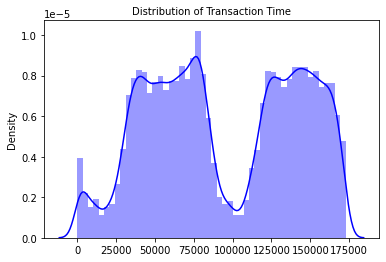

In [9]:
time_val = data['Time'].values
sns.distplot(time_val, color='b').set_title('Distribution of Transaction Time', fontsize=10)
plt.show()

Scaling: Keep in mind that in order to implement a PCA transformation features need to be previously scaled. (In this case, all the V features have been scaled or at least that is what we are assuming the people that develop the dataset did.)

=> 'Time' and 'Amount' should be scaled as the other columns.

In [10]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

data['scaled_amount'] = std_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = std_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)


scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## Build Model Using Original Data (Imbalanced Data)

For Comparation, we will first use the Imbalanced data to train the model

Here we use Logistic Regression

In [11]:
# Import Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 

#Evaluation Metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report


In [12]:
#Split the data into train and test sets
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  random_state=42)
print(X_train.shape)
print(X_test.shape)

train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)
print('-' * 50)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))

(199364, 30)
(85443, 30)
--------------------------------------------------
Label Distributions: 

[0.99821432 0.00178568]
[0.9984083 0.0015917]


In [13]:
clf = LogisticRegression()    
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
accuracy_score_lr = accuracy_score(y_test, predictions)
recall_score_lr = recall_score(y_test, predictions)
precision_score_lr = precision_score(y_test, predictions)
f1_score_lr = f1_score(y_test, predictions)
print('Logistic Regression Result:')
print('Accuracy Score: ', accuracy_score_lr)
print('Recall: ', recall_score_lr)
print('Precision: ', precision_score_lr)
print('F1 Score:', f1_score_lr) 

Logistic Regression Result:
Accuracy Score:  0.9992743700478681
Recall:  0.6323529411764706
Precision:  0.8775510204081632
F1 Score: 0.7350427350427351


Text(0.5, 15.0, 'Predicted Classes')

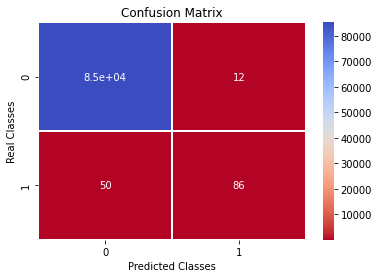

In [14]:
from sklearn.metrics import confusion_matrix
cfn_matrix=confusion_matrix(y_test, predictions)

sns.heatmap(cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Real Classes')
plt.xlabel('Predicted Classes')

In [15]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.63      0.74       136

    accuracy                           1.00     85443
   macro avg       0.94      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443



Trained this Imbalanced Data, although get the high accuracy (up to 99%), but there are bad performance on predict fraudulent

**=> The model must do well on the detection of fraudulent transactions**

## Deal with Imbalanced data 

There are several ways to approach this classification problem taking into consideration this imbalance:


1.   Collect more data? Nice strategy but not applicable in this case
2.  Changing the performance metric:
*   Calculate Precision, Recall, F1-Score
*   ROC curves
3. Resampling the dataset:
Essentially this is a method that will process the data to have an approximate 50-50 ratio:
*   One way to achieve this is by OVER-sampling
*   Another is UNDER-sampling, issue with "Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)

Here I would use the UNDER-Sampling technique 

In [16]:
# Lets shuffle the data before creating the subsamples

data = data.sample(frac=1)

# Amount of fraud classes 492 rows.
fraud_df = data.loc[data['Class'] == 1]
non_fraud_df = data.loc[data['Class'] == 0][:492]

df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
89762,0.333002,-0.675977,0.873265,-0.359738,0.241868,1.187150,-0.405380,-0.147006,0.149326,0.013360,0.102270,-0.000191,0.742811,0.758834,-0.491500,0.418095,-0.387017,0.177568,-0.535950,0.229635,0.293622,0.179797,-0.084133,-0.552724,-0.175476,-0.015240,0.471346,-0.526568,-0.008965,0.040073,0
52521,0.070528,-1.038426,1.001992,0.047938,-0.349002,1.493958,0.186939,0.190966,-0.001112,0.147140,0.580415,-0.792938,-0.984172,-0.567380,-1.105592,-1.381214,0.405490,0.279890,1.132160,0.092993,-0.298920,0.016004,-0.334417,-1.014315,-0.128427,-0.946242,0.456090,-0.453206,0.046627,0.064698,1
236295,0.222495,1.135825,1.788039,-0.370260,-3.430814,0.221214,2.959736,3.080203,0.356240,0.545837,-0.320645,0.327870,0.006648,0.172542,-0.275243,1.044542,0.620192,-0.465990,-0.519509,-0.513290,-0.552896,0.074367,0.203311,0.265828,-0.096829,0.707892,0.458849,-0.478324,-0.039307,-0.045731,0
237426,-0.349231,1.146017,-1.370976,-0.025465,-2.774907,2.650530,4.511309,-3.289344,-0.118841,-0.014279,-0.932773,-2.637442,2.858777,-0.553180,-0.758492,-6.455029,-0.154021,1.323833,5.580209,3.293688,-0.137694,0.701292,-0.048061,-0.599350,0.072193,-0.600351,0.371331,-0.370951,0.011970,0.145895,1
64329,0.046539,-0.920270,-9.848776,7.365546,-12.898538,4.273323,-7.611991,-3.427045,-8.350808,6.863604,-2.387567,-6.065782,2.707856,-6.136034,-0.545976,-7.028980,0.916069,-4.092884,-7.014622,-2.530967,0.554027,0.832398,0.931958,-0.874467,-0.192639,-0.035426,0.538665,-0.263934,1.134095,0.225973,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


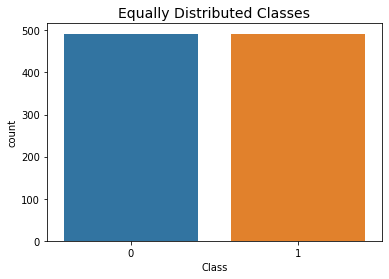

In [17]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))
sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

Correlation matrix

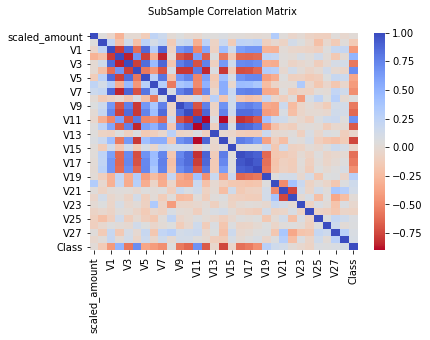

<Figure size 1440x1440 with 0 Axes>

In [18]:
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}).set_title('SubSample Correlation Matrix \n', fontsize=10)
plt.figure(figsize=(20,20))
plt.show()

Observation: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.

V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

Boxplot

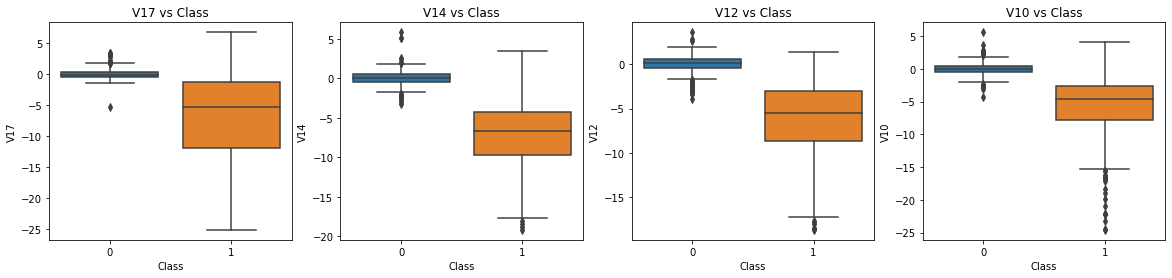

In [19]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, ax=axes[0])
axes[0].set_title('V17 vs Class')

sns.boxplot(x="Class", y="V14", data=new_df, ax=axes[1])
axes[1].set_title('V14 vs Class')


sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[2])
axes[2].set_title('V12 vs Class')


sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[3])
axes[3].set_title('V10 vs Class')

plt.show()

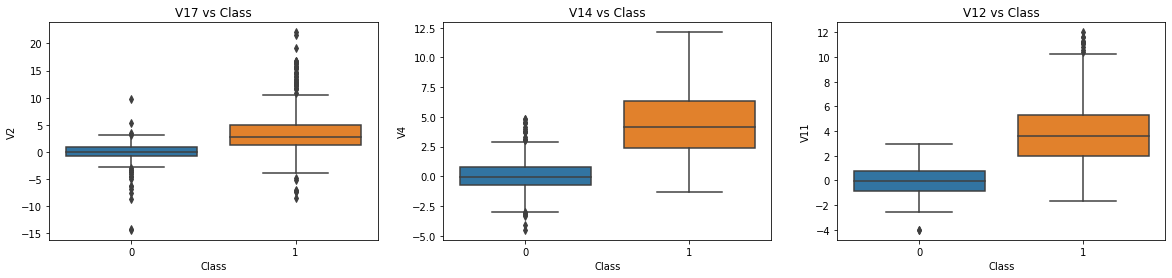

In [20]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V2", data=new_df, ax=axes[0])
axes[0].set_title('V17 vs Class')

sns.boxplot(x="Class", y="V4", data=new_df, ax=axes[1])
axes[1].set_title('V14 vs Class')


sns.boxplot(x="Class", y="V11", data=new_df, ax=axes[2])
axes[2].set_title('V12 vs Class')

plt.show()

Model Building

Here I would using Logistic Regression, SVM, and Random Forest to train under-sample data

In [90]:
#Split the data into train and test sets
from sklearn.model_selection import train_test_split

#import Stratified K-fold for imbalanced data
from sklearn.model_selection import StratifiedKFold

X_new = new_df.iloc[:,:-1]
y_new = new_df.iloc[:,-1]

skf= StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
for train_index, test_index in skf.split(X_new, y_new):
     X_train_new, X_test_new = X_new.iloc[train_index], X_new.iloc[test_index]
     y_train_new, y_test_new = y_new.iloc[train_index], y_new.iloc[test_index]

print(X_train_new.shape)
print(X_test_new.shape)

train_unique_label, train_counts_label = np.unique(y_train_new, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test_new, return_counts=True)
print('-' * 50)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train_new))
print(test_counts_label/ len(y_test_new))

(656, 30)
(328, 30)
--------------------------------------------------
Label Distributions: 

[0.5 0.5]
[0.5 0.5]


In [91]:
# Import Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 

#Evaluation Metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV

Logistic Regression

In [92]:
tuned_params = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]
                }
model = GridSearchCV(LogisticRegression(), tuned_params, cv=skf, n_jobs=-1)
model.fit(X_train_new, y_train_new)
print(model.best_score_)

0.9390194517755157


In [93]:
model.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
clf = model.best_estimator_
clf.fit(X_train_new, y_train_new)

predictions = clf.predict(X_test_new)
accuracy_score_lr = accuracy_score(y_test_new, predictions)
recall_score_lr = recall_score(y_test_new, predictions)
precision_score_lr = precision_score(y_test_new, predictions)
f1_score_lr = f1_score(y_test_new, predictions)
print('Logistic Regression Result:')
print('Accuracy Score: ', accuracy_score_lr)
print('Recall: ', recall_score_lr)
print('Precision: ', precision_score_lr)
print('F1 Score:', f1_score_lr) 

Logistic Regression Result:
Accuracy Score:  0.9512195121951219
Recall:  0.9146341463414634
Precision:  0.9868421052631579
F1 Score: 0.949367088607595


Text(0.5, 15.0, 'Predicted Classes')

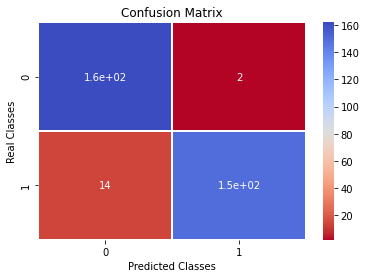

In [95]:
from sklearn.metrics import confusion_matrix
cfn_matrix=confusion_matrix(y_test_new, predictions)

sns.heatmap(cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Real Classes')
plt.xlabel('Predicted Classes')

In [96]:
print(classification_report(y_test_new, predictions))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       164
           1       0.99      0.91      0.95       164

    accuracy                           0.95       328
   macro avg       0.95      0.95      0.95       328
weighted avg       0.95      0.95      0.95       328



In [97]:
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

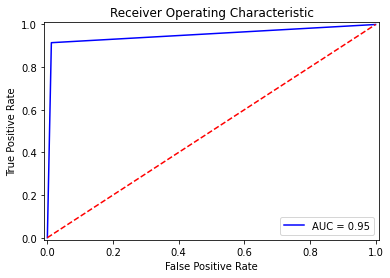

In [98]:
plot_roc_curve(y_test_new, predictions)

SVM

In [120]:
tuned_params = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','sigmoid']
                }
model = GridSearchCV(SVC(), tuned_params, cv=skf, n_jobs=-1)
model.fit(X_train_new, y_train_new)
print(model.best_score_)

0.9405345398181894


In [121]:
model.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [122]:
clf = model.best_estimator_
clf.fit(X_train_new, y_train_new)

predictions = clf.predict(X_test_new)
accuracy_score_sv = accuracy_score(y_test_new, predictions)
recall_score_sv = recall_score(y_test_new, predictions)
precision_score_sv = precision_score(y_test_new, predictions)
f1_score_sv = f1_score(y_test_new, predictions)
print('SVM Result:')
print('Accuracy Score: ', accuracy_score_sv)
print('Recall: ', recall_score_sv)
print('Precision: ', precision_score_sv)
print('F1 Score:', f1_score_sv) 

SVM Result:
Accuracy Score:  0.9451219512195121
Recall:  0.9085365853658537
Precision:  0.9802631578947368
F1 Score: 0.9430379746835442


Text(0.5, 15.0, 'Predicted Classes')

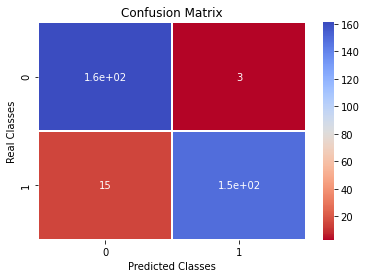

In [123]:
from sklearn.metrics import confusion_matrix
cfn_matrix=confusion_matrix(y_test_new, predictions)

sns.heatmap(cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Real Classes')
plt.xlabel('Predicted Classes')

In [124]:
print(classification_report(y_test_new, predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       164
           1       0.98      0.91      0.94       164

    accuracy                           0.95       328
   macro avg       0.95      0.95      0.95       328
weighted avg       0.95      0.95      0.95       328



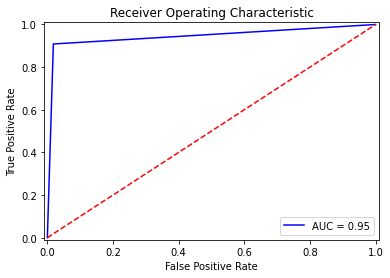

In [125]:
plot_roc_curve(y_test_new, predictions)

Random Forest

In [126]:
tuned_params = {'n_estimators' : [100, 300, 500],
                'max_depth' : [5, 8, 15, 25],
                'min_samples_leaf' : [1, 2, 5] 
                }
model = GridSearchCV(RandomForestClassifier(), tuned_params, cv=skf, n_jobs=-1)
model.fit(X_train_new, y_train_new)
print(model.best_score_)

0.9390194517755157


In [127]:
model.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [128]:
clf = model.best_estimator_

predictions = clf.predict(X_test_new)
accuracy_score_rf = accuracy_score(y_test_new, predictions)
recall_score_rf = recall_score(y_test_new, predictions)
precision_score_rf = precision_score(y_test_new, predictions)
f1_score_rf = f1_score(y_test_new, predictions)
print('Random Forest Result:')
print('Accuracy Score: ', accuracy_score_rf)
print('Recall: ', recall_score_rf)
print('Precision: ', precision_score_rf)
print('F1 Score:', f1_score_rf) 

Random Forest Result:
Accuracy Score:  0.948170731707317
Recall:  0.9146341463414634
Precision:  0.9803921568627451
F1 Score: 0.9463722397476341


Text(0.5, 15.0, 'Predicted Classes')

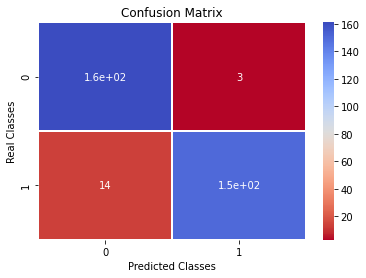

In [129]:
from sklearn.metrics import confusion_matrix
cfn_matrix=confusion_matrix(y_test_new, predictions)

sns.heatmap(cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Real Classes')
plt.xlabel('Predicted Classes')

In [130]:
print(classification_report(y_test_new, predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       164
           1       0.98      0.91      0.95       164

    accuracy                           0.95       328
   macro avg       0.95      0.95      0.95       328
weighted avg       0.95      0.95      0.95       328



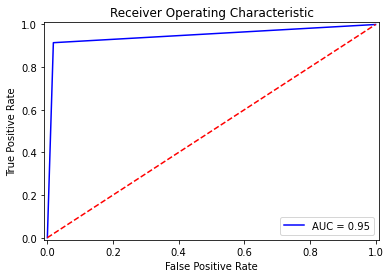

In [131]:
plot_roc_curve(y_test_new, predictions)

From these 3 models, we see that Logistic Regression is offering the highest recall, precision, f1-score and AUC on the generalised unseen data (UNDER-sample test set). 

Let's try to apply Logistic to the whole data set (unseen data)

In [115]:
test=data[~data.isin(X_train_new)].dropna()
print('No Frauds:', test['Class'].value_counts()[0])
print('Frauds:', test['Class'].value_counts()[1])
X_test_whole=test.iloc[:,:-1]
Y_test_whole=test.iloc[:,-1]

No Frauds: 283987
Frauds: 164


In [116]:
clf =LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)  
clf.fit(X_train_new, y_train_new)

predictions = clf.predict(X_test_whole)
accuracy_score_lr_w = accuracy_score(Y_test_whole, predictions)
recall_score_lr_w = recall_score(Y_test_whole, predictions)
precision_score_lr_w = precision_score(Y_test_whole, predictions)
f1_score_lr_w = f1_score(Y_test_whole, predictions)
print('Logistic Regression Result:')
print('Accuracy Score: ', accuracy_score_lr_w)
print('Recall: ', recall_score_lr_w)
print('Precision: ', precision_score_lr_w)
print('F1 Score:', f1_score_lr_w) 

Logistic Regression Result:
Accuracy Score:  0.9745241086605361
Recall:  0.9146341463414634
Precision:  0.020338983050847456
F1 Score: 0.03979307600477517


Text(0.5, 15.0, 'Predicted Classes')

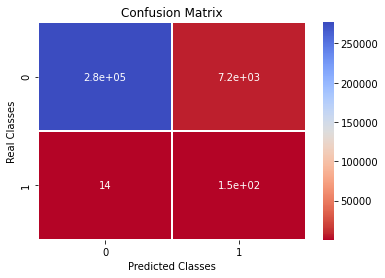

In [117]:
from sklearn.metrics import confusion_matrix
cfn_matrix=confusion_matrix(Y_test_whole, predictions)

sns.heatmap(cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Real Classes')
plt.xlabel('Predicted Classes')

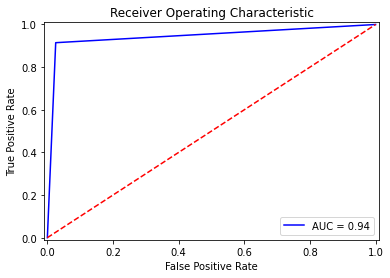

In [118]:
plot_roc_curve(Y_test_whole, predictions)

Therefore, with the aim of this Fraud Detection is maximize the detection of fraudulent transactions, and also minimize the number of false positives;

Our recall is 91.4% (do not miss a fraud transaction). But the number of false positives has still be high, OVER-Sampling method should be apply in the future. 